## Polynomials 4a

In [3]:
random_seed=5
n_points=16
noise_level=0.2

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Your existing data generation code
all_x = np.linspace(-2, 2, 128)
all_y = 0.5 * (all_x-0)**2-1
all_y = 0.5*all_x**2

n_train_points=int(np.floor(n_points*0.8))
n_test_points=n_points-n_train_points
print(n_train_points, n_test_points)
                   
np.random.seed(random_seed) #2 is not bad, 5 is not bad
x=np.random.uniform(-2, 2, n_points)
y=0.5*x**2+noise_level*np.random.randn(n_points)
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

12 4


(-0.5, 2.0)

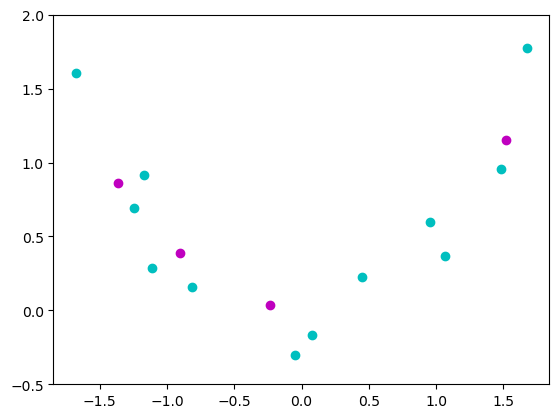

In [5]:
# plt.plot(all_x, all_y)
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.ylim([-0.5, 2])

In [12]:
# Define 2-layer ReLU network
class TwoLayerNet(nn.Module):
    def __init__(self, hidden_size=20):
        super(TwoLayerNet, self).__init__()
        self.layer1 = nn.Linear(1, hidden_size)  # Input to hidden
        self.layer2 = nn.Linear(hidden_size, 1)  # Hidden to output
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [13]:
# Convert data to PyTorch tensors
x_train_tensor = torch.FloatTensor(x_train).reshape(-1, 1)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
x_test_tensor = torch.FloatTensor(x_test).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

In [20]:
hidden_sizes = [5, 10, 15, 16, 17, 20, 40, 80, 160, 320, 500, 1000, 5000, 10000]
num_epochs = 1000 #100000
lr=1e-3
train_losses=[]
test_losses=[]

for h in hidden_sizes:
    print('starting', h)
    model = TwoLayerNet(hidden_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    
    for epoch in range(num_epochs):
        outputs = model(x_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        # Calculate test loss
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        
        if (epoch + 1) % (num_epochs/5) == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())

starting 5
Epoch [200/1000], Train Loss: 0.2835, Test Loss: 0.1051
Epoch [400/1000], Train Loss: 0.2688, Test Loss: 0.0947
Epoch [600/1000], Train Loss: 0.2558, Test Loss: 0.0867
Epoch [800/1000], Train Loss: 0.2431, Test Loss: 0.0797
Epoch [1000/1000], Train Loss: 0.2307, Test Loss: 0.0731
starting 10
Epoch [200/1000], Train Loss: 0.6093, Test Loss: 0.4325
Epoch [400/1000], Train Loss: 0.4292, Test Loss: 0.2143
Epoch [600/1000], Train Loss: 0.4035, Test Loss: 0.1756
Epoch [800/1000], Train Loss: 0.3893, Test Loss: 0.1590
Epoch [1000/1000], Train Loss: 0.3785, Test Loss: 0.1483
starting 15
Epoch [200/1000], Train Loss: 0.3450, Test Loss: 0.1889
Epoch [400/1000], Train Loss: 0.2954, Test Loss: 0.1505
Epoch [600/1000], Train Loss: 0.2677, Test Loss: 0.1261
Epoch [800/1000], Train Loss: 0.2462, Test Loss: 0.1057
Epoch [1000/1000], Train Loss: 0.2292, Test Loss: 0.0894
starting 16
Epoch [200/1000], Train Loss: 0.1848, Test Loss: 0.0653
Epoch [400/1000], Train Loss: 0.1266, Test Loss: 0.019

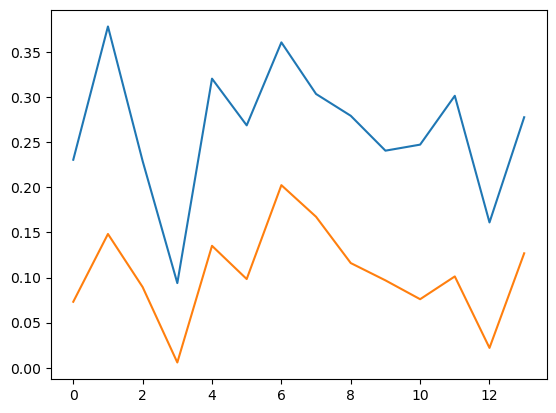

In [24]:
plt.plot(train_losses)
plt.plot(test_losses)